In [155]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [224]:
df_monday = pd.read_csv('monday.csv' ,sep= ';')
df_monday

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [225]:
df_monday['date']= pd.to_datetime(df_monday['timestamp'])
df_monday['hour']= pd.to_datetime(df_monday['timestamp'].astype(str)).dt.hour
df_monday['minute']= pd.to_datetime(df_monday['timestamp'].astype(str)).dt.minute
df_monday.set_index('date', inplace= True)

In [226]:
df_monday.head()

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4


In [227]:
# number of customers on Monday

df_monday['customer_no'].unique()

array([   1,    2,    3, ..., 1445, 1446, 1447], dtype=int64)

In [228]:
# Calculate the total number of customers in each section, on Monday

In [259]:
df_monday.groupby(['location']).nunique() # nunique() function return Series with number of distinct observations over requested axis

,timestamp,customer_no,location,hour,minute
location,,,,,
checkout,700,1437,1,15,60
dairy,527,720,1,15,60
drinks,514,661,1,15,60
fruit,577,827,1,15,60
spices,479,584,1,15,60


Text(0.5, 0, 'location')

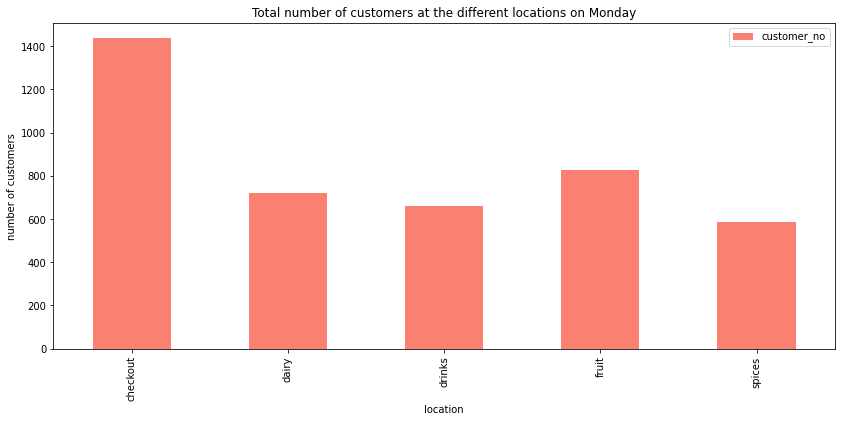

In [260]:
location_count = pd.DataFrame(df_monday.groupby(['location']).nunique())
location_count.drop(['timestamp','location','hour','minute'], axis=1).plot.bar(color= 'salmon')

plt.title('Total number of customers at the different locations on Monday')
plt.ylabel('number of customers')
plt.xlabel('location')

In [231]:
# Calculate the total number of customers in each section over time

In [232]:
df_monday.groupby(['location', 'timestamp'])['customer_no'].count()

location  timestamp          
checkout  2019-09-02 07:05:00    2
          2019-09-02 07:06:00    2
          2019-09-02 07:07:00    1
          2019-09-02 07:08:00    3
          2019-09-02 07:09:00    1
                                ..
spices    2019-09-02 21:43:00    1
          2019-09-02 21:44:00    1
          2019-09-02 21:46:00    2
          2019-09-02 21:48:00    1
          2019-09-02 21:49:00    2
Name: customer_no, Length: 2797, dtype: int64

In [233]:
# Calculate the total number of customers in each section over hour

pd.DataFrame(df_monday.groupby(['location', 'hour'])['customer_no'].count())

customer_no
location hour             
checkout 7              92
         8             112
         9              85
         10             90
         11             55
...                    ...
spices   17             50
         18             70
         19             59
         20             52
         21             18

[75 rows x 1 columns]

In [234]:
# Display the number of customers at checkout over time

In [235]:
df_monday[df_monday['location'] == 'checkout'].groupby('timestamp')['customer_no'].count()

timestamp
2019-09-02 07:05:00    2
2019-09-02 07:06:00    2
2019-09-02 07:07:00    1
2019-09-02 07:08:00    3
2019-09-02 07:09:00    1
                      ..
2019-09-02 21:44:00    1
2019-09-02 21:46:00    1
2019-09-02 21:47:00    2
2019-09-02 21:48:00    2
2019-09-02 21:49:00    2
Name: customer_no, Length: 700, dtype: int64

In [236]:
#let´s see by hour

In [237]:
df_monday[df_monday['location'] == 'checkout'].groupby('hour')['customer_no'].count()

hour
7      92
8     112
9      85
10     90
11     55
12     73
13    120
14     90
15     94
16     86
17    122
18    128
19    129
20    109
21     52
Name: customer_no, dtype: int64

Text(0.5, 0, 'hour')

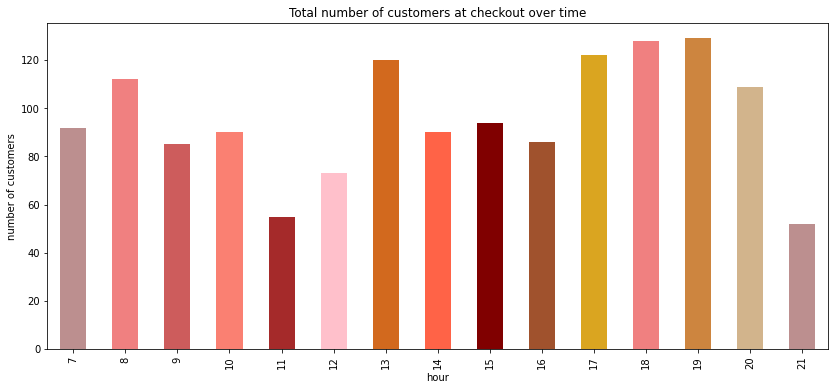

In [238]:
colors = ['rosybrown', 'lightcoral','indianred', 'salmon','brown','pink','chocolate','tomato','maroon','sienna','goldenrod','lightcoral','peru','tan']

df_monday[df_monday['location'] == 'checkout'].groupby('hour')['customer_no'].count().plot.bar(color=colors )
plt.title('Total number of customers at checkout over time')
plt.ylabel('number of customers')
plt.xlabel('hour')

In [239]:
# all inf about customer 7

In [240]:
df_monday[df_monday['customer_no'] == 7].resample('T').asfreq().ffill()

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:04:00,2019-09-02 07:04:00,7.0,spices,7.0,4.0
2019-09-02 07:05:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:06:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:07:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:08:00,2019-09-02 07:05:00,7.0,drinks,7.0,5.0
2019-09-02 07:09:00,2019-09-02 07:09:00,7.0,spices,7.0,9.0
2019-09-02 07:10:00,2019-09-02 07:09:00,7.0,spices,7.0,9.0
2019-09-02 07:11:00,2019-09-02 07:11:00,7.0,fruit,7.0,11.0
2019-09-02 07:12:00,2019-09-02 07:11:00,7.0,fruit,7.0,11.0


In [241]:
# Calculate the time each customer spent in the market

In [242]:
df_monday.head()

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4


In [243]:
arrival_time=df_monday.groupby(['customer_no'], as_index = False) ['timestamp'].min()
arrival_time.rename(columns={'timestamp':'arrival_time'}, inplace=True)
arrival_time

,customer_no,arrival_time
0,1,2019-09-02 07:03:00
1,2,2019-09-02 07:03:00
2,3,2019-09-02 07:04:00
3,4,2019-09-02 07:04:00
4,5,2019-09-02 07:04:00
...,...,...
1442,1443,2019-09-02 21:47:00
1443,1444,2019-09-02 21:48:00
1444,1445,2019-09-02 21:49:00
1445,1446,2019-09-02 21:50:00


In [251]:
check_out_time=df_monday.groupby(['customer_no'],as_index = False) ['timestamp'].max()
check_out_time.rename(columns={'timestamp':'check_out_time'}, inplace=True)
check_out_time

,customer_no,check_out_time
0,1,2019-09-02 07:05:00
1,2,2019-09-02 07:06:00
2,3,2019-09-02 07:06:00
3,4,2019-09-02 07:08:00
4,5,2019-09-02 07:05:00
...,...,...
1442,1443,2019-09-02 21:48:00
1443,1444,2019-09-02 21:49:00
1444,1445,2019-09-02 21:49:00
1445,1446,2019-09-02 21:50:00


In [252]:
time['arrival_time']=pd.to_datetime(time['arrival_time'], format = '%Y-%m-%d %H:%M:%S.%f')

In [253]:
time['check_out_time']=pd.to_datetime(time['check_out_time'] , format = '%Y-%m-%d %H:%M:%S.%f')

In [255]:
time['stay']= time['check_out_time']-time['arrival_time']
time.head(8)

,index,customer_no,arrival_time,check_out_time,stay
0,0,1,2019-09-02 07:03:00,2019-09-02 07:05:00,00:02:00
1,1,2,2019-09-02 07:03:00,2019-09-02 07:06:00,00:03:00
2,2,3,2019-09-02 07:04:00,2019-09-02 07:06:00,00:02:00
3,3,4,2019-09-02 07:04:00,2019-09-02 07:08:00,00:04:00
4,4,5,2019-09-02 07:04:00,2019-09-02 07:05:00,00:01:00
5,5,6,2019-09-02 07:04:00,2019-09-02 07:29:00,00:25:00
6,6,7,2019-09-02 07:04:00,2019-09-02 07:13:00,00:09:00
7,7,8,2019-09-02 07:04:00,2019-09-02 07:07:00,00:03:00


In [256]:
# Calculate the total number of customers present in the supermarket over time.

In [266]:
location_count['customer_no'].sum() # the total number of customers on Monday

4229